<a href="https://colab.research.google.com/github/daRoyalCacti/Stat3007-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [ ]:
#import urllib.request

#%mkdir data

#urllib.request.urlretrieve("http://ufldl.stanford.edu/housenumbers/train_32x32.mat", "data/train_32x32.mat")
#urllib.request.urlretrieve("http://ufldl.stanford.edu/housenumbers/test_32x32.mat", "data/test_32x32.mat")
#urllib.request.urlretrieve("http://ufldl.stanford.edu/housenumbers/extra_32x32.mat", "data/extra_32x32.mat")

('data/extra_32x32.mat', <http.client.HTTPMessage at 0x7f02fc383510>)

In [ ]:
from scipy.io import loadmat

def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('data/train_32x32.mat')
X_test, y_test = load_data('data/test_32x32.mat')
X_extra, y_extra = load_data('data/extra_32x32.mat')

print("Training", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)
print('Extra', X_extra.shape, y_extra.shape)

Training (32, 32, 3, 73257) (73257, 1)
Test (32, 32, 3, 26032) (26032, 1)
Extra (32, 32, 3, 531131) (531131, 1)


In [ ]:
X_train= X_train.transpose((3,2,0,1))
X_test = X_test.transpose((3,2,0,1))
X_extra = X_extra.transpose((3,2,0,1))

print("Training", X_train.shape)
print("Test", X_test.shape)
print("Extra", X_extra.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0] + X_extra.shape[0]

print("Total Number of Images", num_images)

Training (73257, 3, 32, 32)
Test (26032, 3, 32, 32)
Extra (531131, 3, 32, 32)

Total Number of Images 630420


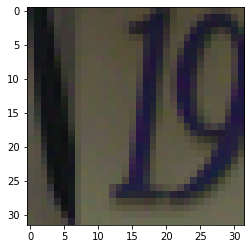

In [ ]:
# Plot some training set images
def plot(img):
    plt.imshow(img.transpose((1,2,0)))
    
plot(X_train[0])

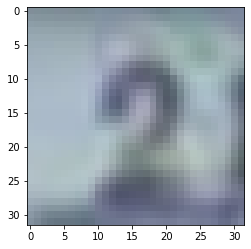

In [ ]:
plot(X_test[1])

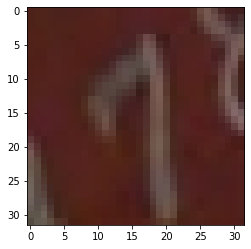

In [ ]:
# Plot some extra set images
plot(X_extra[1])

In [ ]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


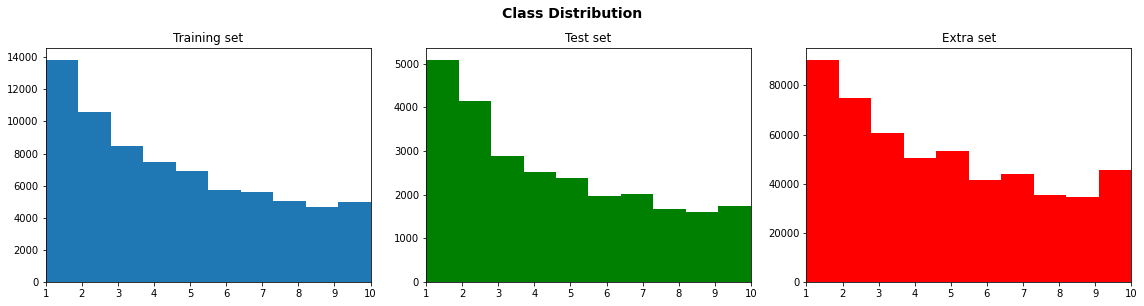

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

ax3.hist(y_extra, color='r', bins=10);
ax3.set_title("Extra set");

fig.tight_layout()

In [ ]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
y_extra[y_extra == 10] = 0

In [ ]:
def balanced_subsample(y, s):
    """Return a balanced subsample of the population"""
    sample = []
    # For every label in the dataset
    for label in np.unique(y):
        # Get the index of all images with a specific label
        images = np.where(y==label)[0]
        # Draw a random sample from the images
        random_sample = np.random.choice(images, size=s, replace=False)
        # Add the random sample to our subsample list
        sample += random_sample.tolist()
    return sample

In [ ]:
# Pick 400 samples per class from the training samples
train_samples = balanced_subsample(y_train, 400)
# Pick 200 samples per class from the extra dataset
extra_samples = balanced_subsample(y_extra, 200)

X_val, y_val = np.copy(X_train[train_samples]), np.copy(y_train[train_samples])

# Remove the samples to avoid duplicates
X_train = np.delete(X_train, train_samples, axis=0)
y_train = np.delete(y_train, train_samples, axis=0)

X_val = np.concatenate([X_val, np.copy(X_extra[extra_samples])])
y_val = np.concatenate([y_val, np.copy(y_extra[extra_samples])])

# Remove the samples to avoid duplicates
X_extra = np.delete(X_extra, extra_samples, axis=0)
y_extra = np.delete(y_extra, extra_samples, axis=0)

#Combine the training set and extra data set together
X_train = np.concatenate([X_train, X_extra])
y_train = np.concatenate([y_train, y_extra])
X_test, y_test = X_test, y_test

print("Training", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)
print('Validation', X_val.shape, y_val.shape)

Training (598388, 3, 32, 32) (598388, 1)
Test (26032, 3, 32, 32) (26032, 1)
Validation (6000, 3, 32, 32) (6000, 1)


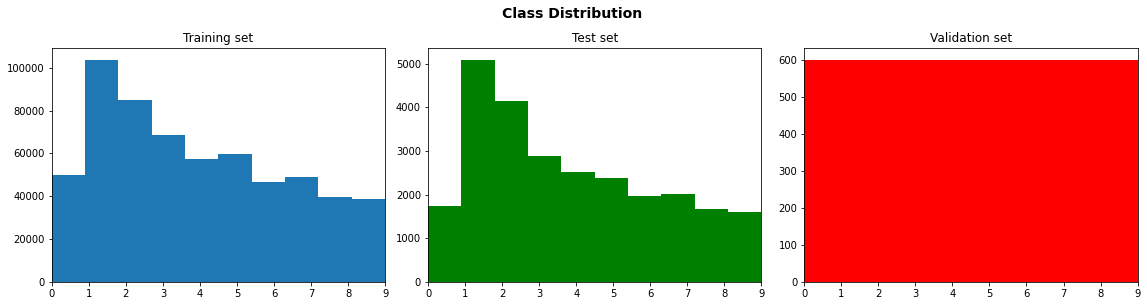

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(0, 9)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

ax3.hist(y_val, color='r', bins=10);
ax3.set_title("Validation set");

fig.tight_layout()

In [ ]:
assert(num_images == X_train.shape[0] + X_test.shape[0] + X_val.shape[0])

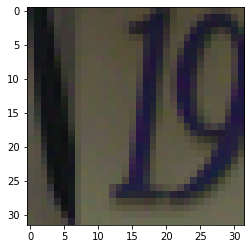

In [ ]:
# Display some samples images from the training set
plot(X_train[0])

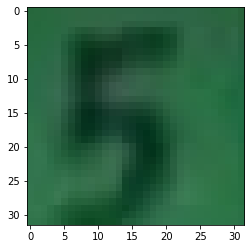

In [ ]:
# Display some samples images from the test set
plot(X_test[0])

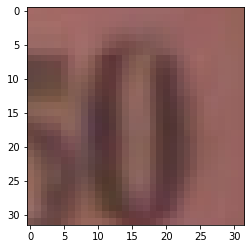

In [ ]:
# Display some samples images from the validation set
plot(X_val[0])

In [ ]:
suffixes = ['B', 'KB', 'MB', 'GB']

def humansize(nbytes):
    if nbytes == 0: return '0 B'
    i = 0
    while nbytes >= 1024:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])

In [ ]:
X_train[:,0,:].shape

(598388, 32, 32)

In [ ]:
def rgb2gray(rgb):
    gray = 0.2989 *rgb[:,0,:]+ 0.5870 *rgb[:,1,:]+ 0.1140 * rgb[:,2,:]
    return gray


refer to [here](https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale)

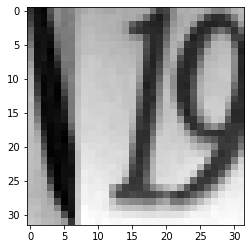

In [ ]:
train_grayscale = rgb2gray(X_train).astype(np.float32)
plt.imshow(train_grayscale[0], cmap='gray')

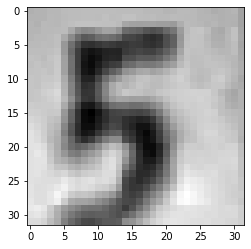

In [ ]:
test_grayscale = rgb2gray(X_test).astype(np.float32)
plt.imshow(test_grayscale[0], cmap='gray')

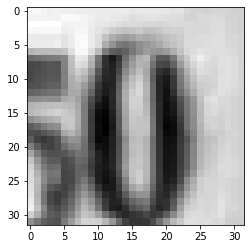

In [ ]:
valid_grayscale = rgb2gray(X_val).astype(np.float32)
plt.imshow(valid_grayscale[0], cmap='gray')

In [ ]:
# Keep the size before convertion
size_before = (X_train.nbytes, X_test.nbytes, X_val.nbytes)

# Size after transformation
size_after = (train_grayscale.nbytes, test_grayscale.nbytes, valid_grayscale.nbytes)

print("Dimensions")
print("Training set", X_train.shape, train_grayscale.shape)
print("Test set", X_test.shape, test_grayscale.shape)
print("Validation set", X_val.shape, valid_grayscale.shape)
print('')

print("Data Type")
print("Training set", X_train.dtype, train_grayscale.dtype)
print("Test set", X_test.dtype, test_grayscale.dtype)
print("Validation set", X_val.dtype, valid_grayscale.dtype)
print('')

print("Dataset Size")
print("Training set", humansize(size_before[0]), humansize(size_after[0]))
print("Test set", humansize(size_before[1]), humansize(size_after[1]))
print("Validation set", humansize(size_before[2]), humansize(size_after[2]))

Dimensions
Training set (598388, 3, 32, 32) (598388, 32, 32)
Test set (26032, 3, 32, 32) (26032, 32, 32)
Validation set (6000, 3, 32, 32) (6000, 32, 32)

Data Type
Training set uint8 float32
Test set uint8 float32
Validation set uint8 float32

Dataset Size
Training set 1.71 GB 2.28 GB
Test set 76.27 MB 101.69 MB
Validation set 17.58 MB 23.44 MB


In [ ]:
y_no1hot_train = y_train
y_no1hot_test = y_test
y_no1hot_val = y_val

In [ ]:
from sklearn.preprocessing import OneHotEncoder
 
# # Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# # Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Test set", y_test.shape)
print("Training set", y_val.shape)

Training set (598388, 10)
Test set (26032, 10)
Training set (6000, 10)


In [ ]:
import h5py

# Create file
h5f = h5py.File('data/SVHN_single.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=X_train)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=X_test)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=X_val)
h5f.create_dataset('y_val', data=y_val)
h5f.create_dataset('y_no1hot_train', data=y_no1hot_train)
h5f.create_dataset('y_no1hot_test', data=y_no1hot_test)
h5f.create_dataset('y_y_no1hot_val', data=y_no1hot_val)

# Close the file
h5f.close()

In [ ]:
import h5py

# Create file
h5f = h5py.File('data/SVHN_single_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=train_grayscale)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=test_grayscale)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=valid_grayscale)
h5f.create_dataset('y_val', data=y_val)
h5f.create_dataset('y_no1hot_train', data=y_no1hot_train)
h5f.create_dataset('y_no1hot_test', data=y_no1hot_test)
h5f.create_dataset('y_y_no1hot_val', data=y_no1hot_val)

# Close the file
h5f.close()

**Pre-processing done**

**Transfer learning begin:**

In [208]:
import os

# third-party library
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 2             # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = False

In [209]:
torch.manual_seed(1)
# load the feature network
feature_net = torch.load('fnet.pt')    
# create 3 random images of size 1x28x28
images = torch.rand(3, 1, 28, 28)
# compute the features for the 3 random images
feature_net(images).shape # this shape should be 3x84  
#Seems like we use a CNN to extract the features of the Images. Sounds like the purpose of it is like PCA or other similar methods.

torch.Size([3, 84])

In [210]:
from torchvision.datasets import MNIST

mnist_tr = MNIST('~/.torchvision', train=True, download=True)
x_train, y_train = mnist_tr.data, mnist_tr.targets
mnist_ts = MNIST('~/.torchvision', train=False, download=True)
x_test, y_test = mnist_ts.data, mnist_ts.targets


x_train = x_train.reshape(x_train.shape[0], 1,28, 28)  #Reshape the image to input into the feature net successfully
x_test = x_test.reshape(x_test.shape[0],1,28, 28)
x_train = x_train/255
x_test = x_test/255
x_train = feature_net(x_train)
x_test = feature_net(x_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
x_train1nb, y_train1nb = mnist_tr.data, mnist_tr.targets    #Reload the MNIST dataset as the x_train... and pre-process.
x_train1nb = x_train1nb.reshape(len(x_train1nb), -1).float()
Xx= x_train1nb.detach().numpy()
Yy = y_train1nb.detach().numpy()
x_test1nb, y_test1nb = mnist_ts.data, mnist_ts.targets
x_test1nb = x_test1nb.reshape(len(x_test1nb), -1).float()
Xxt= x_test1nb.detach().numpy()
Yyt = y_test1nb.detach().numpy()

torch.Size([60000, 84]) torch.Size([60000])
torch.Size([10000, 84]) torch.Size([10000])


In [212]:
import sklearn
import time
X = x_train.detach().numpy()                 #Pre-process the input to apply NB classifier.
Y = y_train.detach().numpy()
Xt = x_test.detach().numpy()
Yt = y_test.detach().numpy()

In [215]:
from sklearn.naive_bayes import MultinomialNB     #Take the features extracted in (b) as input
MNB = MultinomialNB()
start = time.time()
MNB.fit(X,Y)
end = time.time()
print('The training set accuracy is','%.5f'%MNB.score(X,Y))     #MNB1 is for feature net model
print('the running time is',end-start)

The training set accuracy is 0.99558
the running time is 0.040328264236450195


In [216]:
from sklearn.naive_bayes import MultinomialNB
MNB2 = MultinomialNB()              
MNB2.fit(Xx,Yy)
print('The training set accuracy is','%.5f'%MNB2.score(Xx,Yy))        #MNB2 is for simple model

The training set accuracy is 0.82528


In [239]:
import h5py
# Open the file as readonly
h5f = h5py.File('data/SVHN_single_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_no1hot_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_no1hot_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_y_no1hot_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (598388, 32, 32) (598388, 1)
Validation set (6000, 32, 32) (6000, 1)
Test set (26032, 32, 32) (26032, 1)


In [240]:
y_train.shape

(598388, 1)

In [241]:
X_train = X_train[:,2:30, 2:30]
X_test = X_test[:,2:30, 2:30]
X_val = X_val[:,2:30, 2:30]

In [242]:
x_train2nb = X_train.reshape(len(X_train), -1)

In [243]:
x_train2nb

array([[ 17.3834,  31.171 ,  61.6796, ..., 102.0085, 101.1396, 102.0516],
       [ 53.7389,  29.3113,  28.7998, ..., 100.2429, 103.1178, 101.9376],
       [ 49.1838,  49.9665,  53.906 , ..., 131.1378, 128.9208, 127.7638],
       ...,
       [191.138 , 191.138 , 191.9099, ..., 189.2692, 187.4974, 186.3126],
       [192.0131, 193.013 , 193.241 , ..., 189.0134, 188.1275, 187.1276],
       [194.2409, 193.5399, 193.5399, ..., 192.8389, 194.1269, 194.1269]],
      dtype=float32)

In [244]:
print('The training set accuracy is','%.5f'%MNB2.score(x_train2nb,y_no1hot_train))

The training set accuracy is 0.13466


In [245]:
x_train2nb = torch.Tensor(X_train.reshape(X_train.shape[0], 1,28, 28))
x_train2nb = x_train2nb/255

In [255]:
x_train2nbe = feature_net(x_train2nb[100000:110000])
x_train2nbe = x_train2nbe.detach().numpy()

In [252]:
x_train2nbt = feature_net(x_train2nb[0:10000])
x_train2nbt = x_train2nbt.detach().numpy()

In [251]:
x_train2nbt.shape

(598388, 1, 28, 28)

In [253]:
print('The training set accuracy is','%.5f'%MNB.score(x_train2nbt,y_no1hot_train[0:10000]))

The training set accuracy is 0.17760


In [256]:
print('The training set accuracy is','%.5f'%MNB.score(x_train2nbe,y_no1hot_train[100000:110000]))

The training set accuracy is 0.19850


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


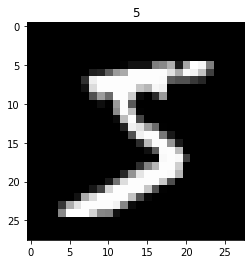

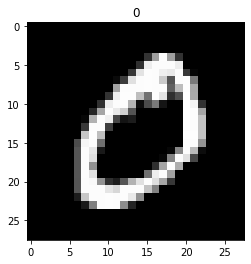

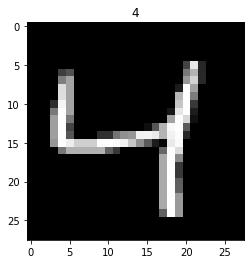

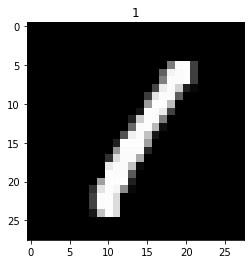

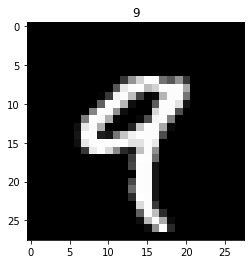

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# Mnist digits dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    # not mnist dir or mnist is empyt dir
    DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)

# plot one example
# print(train_data.train_data.size())                 # (60000, 28, 28)
# print(train_data.train_labels.size())               # (60000)
for i in range(5):
    plt.imshow(train_data.train_data[i].numpy(), cmap='gray')
    plt.title('%i' % train_data.train_labels[i])
    plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [ ]:
cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted


for epoch in range(2):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze().numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.4f' % accuracy)
#             if HAS_SK:
#                 # Visualization of trained flatten layer (T-SNE)
#                 tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
#                 plot_only = 500
#                 low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
#                 labels = test_y.numpy()[:plot_only]
#                 plot_with_labels(low_dim_embs, labels)
# plt.ioff()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3044 | test accuracy: 0.1300
Epoch:  0 | train loss: 0.6795 | test accuracy: 0.8245
Epoch:  0 | train loss: 0.3999 | test accuracy: 0.8960
Epoch:  0 | train loss: 0.2499 | test accuracy: 0.9045
Epoch:  0 | train loss: 0.3463 | test accuracy: 0.9265
Epoch:  0 | train loss: 0.0731 | test accuracy: 0.9425
Epoch:  0 | train loss: 0.1174 | test accuracy: 0.9480
Epoch:  0 | train loss: 0.0618 | test accuracy: 0.9490
Epoch:  0 | train loss: 0.0396 | test accuracy: 0.9605
Epoch:  0 | train loss: 0.1418 | 

In [ ]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:30])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:30].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1] prediction number
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1] real number


In [157]:
torch.save(cnn, "mnist_model.pth")

NameError: ignored

In [156]:
del cnn

NameError: ignored

In [158]:
import os

# third-party library
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 10             # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate

In [159]:
model = torch.load("mnist_model.pth") 

In [160]:
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [161]:
for param in model.conv1.parameters():             # freeze the parameters
    param.requires_grad = False
    
for param in model.conv2.parameters():
    param.requires_grad = False

In [162]:
import os
import time
import h5py
import numpy as np

In [163]:
# Open the file as readonly
h5f = h5py.File('data/SVHN_single_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_no1hot_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_no1hot_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_y_no1hot_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (598388, 32, 32) (598388, 1)
Validation set (6000, 32, 32) (6000, 1)
Test set (26032, 32, 32) (26032, 1)


In [164]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()
y_val = y_val.squeeze()

In [165]:
y_train[1]

9

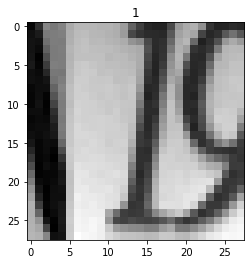

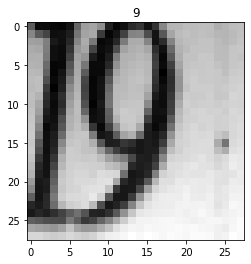

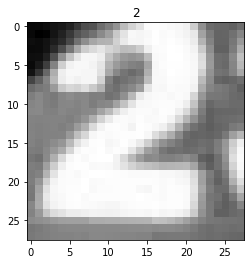

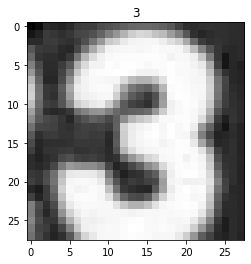

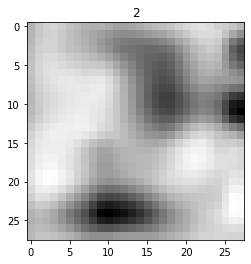

In [166]:
for i in range(5):
    plt.imshow(X_train[i][2:30, 2:30], cmap='gray')
    plt.title('%i' % y_train[i])
    plt.show()

In [167]:
X_train = X_train[:,2:30, 2:30]
X_test = X_test[:,2:30, 2:30]
X_val = X_val[:,2:30, 2:30]

In [168]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
X_val = np.expand_dims(X_val, axis=1)

In [169]:
# # Calculate the mean on the training data
# train_mean = np.mean(X_train, axis=0)

# # Calculate the std on the training data
# train_std = np.std(X_train, axis=0)

# # Subtract it equally from all splits
# X_train = (X_train - train_mean) / train_std
# X_test = (X_test - train_mean)  / train_std
# X_val = (train_mean - X_val) / train_std
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [170]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)


In [171]:
train_dataset = MyDataset(X_train, y_train)
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
)

In [172]:
test_dataset = MyDataset(X_test, y_test)
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=True,
)
test_dataiter = iter(test_loader)

In [173]:
val_dataset = MyDataset(X_val, y_val)
val_loader = DataLoader(
    val_dataset,
    batch_size=50,
    shuffle=True,
)
val_dataiter = iter(val_loader)

In [174]:
torch.cuda.is_available()
torch.cuda.device_count()

1

In [175]:
optimizer = torch.optim.Adam(model.out.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()       

In [176]:
for epoch in range(EPOCH):
    
    running_loss = 0.0
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = model(b_x)[0]            # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        running_loss += loss.item()
        
        if step % 1000 == 999:
            images, labels = val_dataiter.next()
            val_output, last_layer = model(images)
            pred_y = torch.max(val_output, 1)[1].data.squeeze().numpy()
            accuracy = float((pred_y == labels.data.numpy()).astype(int).sum()) / float(labels.size(0))
            print('Epoch: ', epoch+1, '|step: ',step, '| train loss: %.4f' % running_loss, '| val accuracy: %.4f' % accuracy)
            running_loss = 0.0

Epoch:  1 |step:  999 | train loss: 899.3520 | val accuracy: 0.7800
Epoch:  1 |step:  1999 | train loss: 606.4759 | val accuracy: 0.7600
Epoch:  1 |step:  2999 | train loss: 544.0653 | val accuracy: 0.6600
Epoch:  1 |step:  3999 | train loss: 507.6745 | val accuracy: 0.8400
Epoch:  1 |step:  4999 | train loss: 493.7790 | val accuracy: 0.8400
Epoch:  1 |step:  5999 | train loss: 478.3856 | val accuracy: 0.8200
Epoch:  1 |step:  6999 | train loss: 460.6619 | val accuracy: 0.8400
Epoch:  1 |step:  7999 | train loss: 453.4858 | val accuracy: 0.7400
Epoch:  1 |step:  8999 | train loss: 445.2790 | val accuracy: 0.8800
Epoch:  2 |step:  999 | train loss: 429.8229 | val accuracy: 0.7800
Epoch:  2 |step:  1999 | train loss: 420.8843 | val accuracy: 0.8600
Epoch:  2 |step:  2999 | train loss: 426.5253 | val accuracy: 0.8200
Epoch:  2 |step:  3999 | train loss: 421.0541 | val accuracy: 0.8600
Epoch:  2 |step:  4999 | train loss: 421.8538 | val accuracy: 0.8400
Epoch:  2 |step:  5999 | train loss:

In [177]:
test_loader2 = DataLoader(
    test_dataset,
    batch_size=26032,
    shuffle=True,
)

In [178]:
for image, labels in test_loader2:
  pred_y = torch.max(model(image)[0], 1)[1].data.squeeze().numpy()
  accuracy = float((pred_y == labels.data.numpy()).astype(int).sum()) / float(labels.size(0))
print(accuracy)

0.8421173939766441


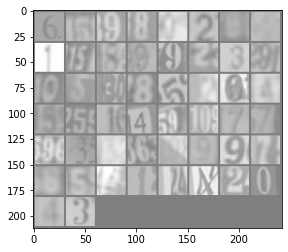

GroundTruth:  tensor(6) tensor(5) tensor(9) tensor(8) tensor(0) tensor(2) tensor(8) tensor(4) tensor(1) tensor(5) tensor(8) tensor(9) tensor(9) tensor(2) tensor(3) tensor(9) tensor(0) tensor(5) tensor(3) tensor(8) tensor(5) tensor(2) tensor(6) tensor(4) tensor(5) tensor(5) tensor(1) tensor(4) tensor(9) tensor(0) tensor(7) tensor(7) tensor(9) tensor(3) tensor(3) tensor(6) tensor(9) tensor(9) tensor(9) tensor(7) tensor(8) tensor(5) tensor(4) tensor(1) tensor(2) tensor(4) tensor(2) tensor(0) tensor(4) tensor(3)


In [186]:
images, labels = val_dataiter.next()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(50)))

In [187]:
test_output, last_layer = model(images)
pred_y = torch.max(test_output, 1)[1].data.squeeze().numpy()

print('Predicted: ', ' '.join('%5s' % pred_y[j]
                              for j in range(50)))

Predicted:      6     5     9     8     0     2     6     5     1     5     8     9     9     2     3     9     0     3     3     8     4     2     6     4     5     5     1     4     0     0     7     7     9     3     3     6     6     9     9     7     6     5     4     1     2     1     2     0     4     3
